# Sleep Cycle Productivity <hr style= "border: 2.5px solid #f0c059">

Name: **Alessandra P. Blanco** <br>
Section: **CPE2A**

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of Dataset

In [413]:
df = pd.read_csv(r"../raw/sleep-cycle-productivity.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           4771 non-null   object 
 1   Person_ID                      4737 non-null   float64
 2   Age                            4761 non-null   float64
 3   Gender                         4736 non-null   object 
 4   Sleep Start Time               4760 non-null   float64
 5   Sleep End Time                 4754 non-null   float64
 6   Total Sleep Hours              4772 non-null   float64
 7   Sleep Quality                  4741 non-null   float64
 8   Exercise (mins/day)            4764 non-null   float64
 9   Caffeine Intake (mg)           4756 non-null   float64
 10  Screen Time Before Bed (mins)  4740 non-null   float64
 11  Work Hours (hrs/day)           4763 non-null   float64
 12  Productivity Score             4758 non-null   f

In [414]:
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860.0,32.0,Other,23.33,4.61,5.28,3.0,86.0,87.0,116.0,8.808920,8.0,3.0,6.0
1,2024-11-04,1769.0,41.0,Female,21.02,2.43,5.41,5.0,32.0,21.0,88.0,6.329833,NaN,3.0,7.0
2,2024-08-31,2528.0,20.0,Male,22.10,3.45,5.35,7.0,17.0,88.0,59.0,8.506306,10.0,9.0,10.0
3,2024-02-22,8041.0,37.0,Other,23.10,6.65,7.55,8.0,46.0,34.0,80.0,6.070240,8.0,4.0,2.0
4,2024-02-23,4843.0,46.0,Other,21.42,4.17,6.75,10.0,61.0,269.0,94.0,11.374994,8.0,7.0,9.0


In [415]:
df = df.drop(df.columns[0],axis=1)
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,1860.0,32.0,Other,23.33,4.61,5.28,3.0,86.0,87.0,116.0,8.808920,8.0,3.0,6.0
1,1769.0,41.0,Female,21.02,2.43,5.41,5.0,32.0,21.0,88.0,6.329833,NaN,3.0,7.0
2,2528.0,20.0,Male,22.10,3.45,5.35,7.0,17.0,88.0,59.0,8.506306,10.0,9.0,10.0
3,8041.0,37.0,Other,23.10,6.65,7.55,8.0,46.0,34.0,80.0,6.070240,8.0,4.0,2.0
4,4843.0,46.0,Other,21.42,4.17,6.75,10.0,61.0,269.0,94.0,11.374994,8.0,7.0,9.0


In [416]:
df_w = df.rename(columns={
    'Person_ID': 'id',
    'Age': 'Age',
    'Gender': 'Gender',
    'Sleep Start Time': 'Sleep_Start',
    'Sleep End Time': 'Sleep_End',
    'Total Sleep Hours': 'Sleep_Duration',
    'Sleep Quality': 'Sleep_Quality',
    'Exercise (mins/day)': 'Exercise_Time',
    'Caffeine Intake (mg)': 'Caffeine_Intake',
    'Screen Time Before Bed (mins)': 'Screen_Time_Before_Bed',
    'Work Hours (hrs/day)': 'Work_Hours',
    'Productivity Score': 'Productivity_Score',
    'Mood Score': 'Mood_Score',
    'Stress Level': 'Stress_Level'
})
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4737 non-null   float64
 1   Age                     4761 non-null   float64
 2   Gender                  4736 non-null   object 
 3   Sleep_Start             4760 non-null   float64
 4   Sleep_End               4754 non-null   float64
 5   Sleep_Duration          4772 non-null   float64
 6   Sleep_Quality           4741 non-null   float64
 7   Exercise_Time           4764 non-null   float64
 8   Caffeine_Intake         4756 non-null   float64
 9   Screen_Time_Before_Bed  4740 non-null   float64
 10  Work_Hours              4763 non-null   float64
 11  Productivity_Score      4758 non-null   float64
 12  Mood_Score              4739 non-null   float64
 13  Stress_Level            4746 non-null   float64
dtypes: float64(13), object(1)
memory usage: 

# Determining Distinct Values

In [417]:
df_w['id'].unique()

array([1860., 1769., 2528., ..., 7134., 4205., 2304.], shape=(3717,))

df_w['id'].nunique()

# Data Cleaning - Dropping NaN

In [418]:
df_w.isna().sum()

id                        263
Age                       239
Gender                    264
Sleep_Start               240
Sleep_End                 246
Sleep_Duration            228
Sleep_Quality             259
Exercise_Time             236
Caffeine_Intake           244
Screen_Time_Before_Bed    260
Work_Hours                237
Productivity_Score        242
Mood_Score                261
Stress_Level              254
dtype: int64

In [419]:
# Cleaning Age
df_w = df_w.dropna(subset=['Age'])
df_w.isna().sum()

id                        252
Age                         0
Gender                    248
Sleep_Start               234
Sleep_End                 237
Sleep_Duration            213
Sleep_Quality             245
Exercise_Time             225
Caffeine_Intake           238
Screen_Time_Before_Bed    247
Work_Hours                228
Productivity_Score        230
Mood_Score                247
Stress_Level              245
dtype: int64

In [420]:
# Cleaning Gender
df_w = df_w.dropna(subset=['Gender'])
df_w.isna().sum()

id                        239
Age                         0
Gender                      0
Sleep_Start               220
Sleep_End                 226
Sleep_Duration            205
Sleep_Quality             230
Exercise_Time             212
Caffeine_Intake           228
Screen_Time_Before_Bed    232
Work_Hours                218
Productivity_Score        218
Mood_Score                234
Stress_Level              229
dtype: int64

In [421]:
# Cleaning Sleep_Start
df_w = df_w.dropna(subset=['Sleep_Start'])
df_w.isna().sum()

id                        230
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                 219
Sleep_Duration            196
Sleep_Quality             224
Exercise_Time             200
Caffeine_Intake           215
Screen_Time_Before_Bed    227
Work_Hours                212
Productivity_Score        202
Mood_Score                220
Stress_Level              218
dtype: int64

In [422]:
# Cleaning Sleep_End
df_w = df_w.dropna(subset=['Sleep_End'])
df_w.isna().sum()

id                        215
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration            187
Sleep_Quality             216
Exercise_Time             191
Caffeine_Intake           200
Screen_Time_Before_Bed    215
Work_Hours                203
Productivity_Score        192
Mood_Score                208
Stress_Level              206
dtype: int64

In [423]:
# Cleaning Sleep_Duration
df_w = df_w.dropna(subset=['Sleep_Duration'])
df_w.isna().sum()

id                        208
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality             209
Exercise_Time             182
Caffeine_Intake           189
Screen_Time_Before_Bed    204
Work_Hours                194
Productivity_Score        181
Mood_Score                204
Stress_Level              197
dtype: int64

In [424]:
# Cleaning Sleep_Quality
df_w = df_w.dropna(subset=['Sleep_Quality'])
df_w.isna().sum()

id                        195
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time             172
Caffeine_Intake           172
Screen_Time_Before_Bed    191
Work_Hours                189
Productivity_Score        170
Mood_Score                189
Stress_Level              184
dtype: int64

In [425]:
# Cleaning Exercise_Time
df_w = df_w.dropna(subset=['Exercise_Time'])
df_w.isna().sum()

id                        186
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake           161
Screen_Time_Before_Bed    181
Work_Hours                178
Productivity_Score        168
Mood_Score                182
Stress_Level              178
dtype: int64

In [426]:
# Cleaning Caffeine_Intake
df_w = df_w.dropna(subset=['Caffeine_Intake'])
df_w.isna().sum()

id                        174
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed    171
Work_Hours                168
Productivity_Score        155
Mood_Score                170
Stress_Level              168
dtype: int64

In [427]:
# Cleaning Screen_Time_Before_Bed
df_w = df_w.dropna(subset=['Screen_Time_Before_Bed'])
df_w.isna().sum()

id                        164
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed      0
Work_Hours                156
Productivity_Score        152
Mood_Score                157
Stress_Level              158
dtype: int64

In [428]:
# Cleaning Work_Hours
df_w = df_w.dropna(subset=['Work_Hours'])
df_w.isna().sum()

id                        155
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed      0
Work_Hours                  0
Productivity_Score        146
Mood_Score                149
Stress_Level              148
dtype: int64

In [429]:
# Cleaning Productivity_Score
df_w = df_w.dropna(subset=['Productivity_Score'])
df_w.isna().sum()

id                        153
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed      0
Work_Hours                  0
Productivity_Score          0
Mood_Score                140
Stress_Level              143
dtype: int64

In [430]:
# Cleaning Mood_Score
df_w = df_w.dropna(subset=['Mood_Score'])
df_w.isna().sum()

id                        146
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed      0
Work_Hours                  0
Productivity_Score          0
Mood_Score                  0
Stress_Level              130
dtype: int64

In [431]:
# Cleaning Stress_Level
df_w = df_w.dropna(subset=['Stress_Level'])
df_w.isna().sum()

id                        142
Age                         0
Gender                      0
Sleep_Start                 0
Sleep_End                   0
Sleep_Duration              0
Sleep_Quality               0
Exercise_Time               0
Caffeine_Intake             0
Screen_Time_Before_Bed      0
Work_Hours                  0
Productivity_Score          0
Mood_Score                  0
Stress_Level                0
dtype: int64

In [432]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2602 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2460 non-null   float64
 1   Age                     2602 non-null   float64
 2   Gender                  2602 non-null   object 
 3   Sleep_Start             2602 non-null   float64
 4   Sleep_End               2602 non-null   float64
 5   Sleep_Duration          2602 non-null   float64
 6   Sleep_Quality           2602 non-null   float64
 7   Exercise_Time           2602 non-null   float64
 8   Caffeine_Intake         2602 non-null   float64
 9   Screen_Time_Before_Bed  2602 non-null   float64
 10  Work_Hours              2602 non-null   float64
 11  Productivity_Score      2602 non-null   float64
 12  Mood_Score              2602 non-null   float64
 13  Stress_Level            2602 non-null   float64
dtypes: float64(13), object(1)
memory usage: 304.9

In [433]:
df_w.describe()

,id,Age,Sleep_Start,Sleep_End,Sleep_Duration,Sleep_Quality,Exercise_Time,Caffeine_Intake,Screen_Time_Before_Bed,Work_Hours,Productivity_Score,Mood_Score,Stress_Level
count,2460.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,5543.039431,38.637586,22.012698,4.991741,6.979105,5.435050,44.603382,147.963490,90.821676,7.957733,5.615680,5.342045,5.651038
std,2565.589849,12.236413,1.164105,1.849712,1.450643,2.870894,25.703442,85.456599,52.546156,2.268060,2.877058,2.842906,2.897130
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.000000,0.000000,4.001816,1.000000,1.000000,1.000000
25%,3334.250000,28.000000,21.000000,3.700000,5.690000,3.000000,22.000000,75.000000,44.000000,6.025674,3.000000,3.000000,3.000000
50%,5626.000000,39.000000,22.050000,5.010000,6.970000,5.000000,45.000000,146.500000,92.000000,7.944503,6.000000,5.000000,6.000000
75%,7743.250000,49.000000,23.027500,6.330000,8.200000,8.000000,66.000000,222.000000,135.000000,9.866618,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.000000,179.000000,11.997559,10.000000,10.000000,10.000000


# Saving the Cleaned Dataset

In [434]:
df_w.to_csv(r"..\raw\sleep-cycle-productivity-cleaned.csv", index=False)

# Data Visualization

In [435]:
df = pd.read_csv(r"../raw/sleep-cycle-productivity-cleaned.csv",
                delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2460 non-null   float64
 1   Age                     2602 non-null   float64
 2   Gender                  2602 non-null   object 
 3   Sleep_Start             2602 non-null   float64
 4   Sleep_End               2602 non-null   float64
 5   Sleep_Duration          2602 non-null   float64
 6   Sleep_Quality           2602 non-null   float64
 7   Exercise_Time           2602 non-null   float64
 8   Caffeine_Intake         2602 non-null   float64
 9   Screen_Time_Before_Bed  2602 non-null   float64
 10  Work_Hours              2602 non-null   float64
 11  Productivity_Score      2602 non-null   float64
 12  Mood_Score              2602 non-null   float64
 13  Stress_Level            2602 non-null   float64
dtypes: float64(13), object(1)
memory usage: 

In [436]:
df_w = df.copy()

Correlation Matrix

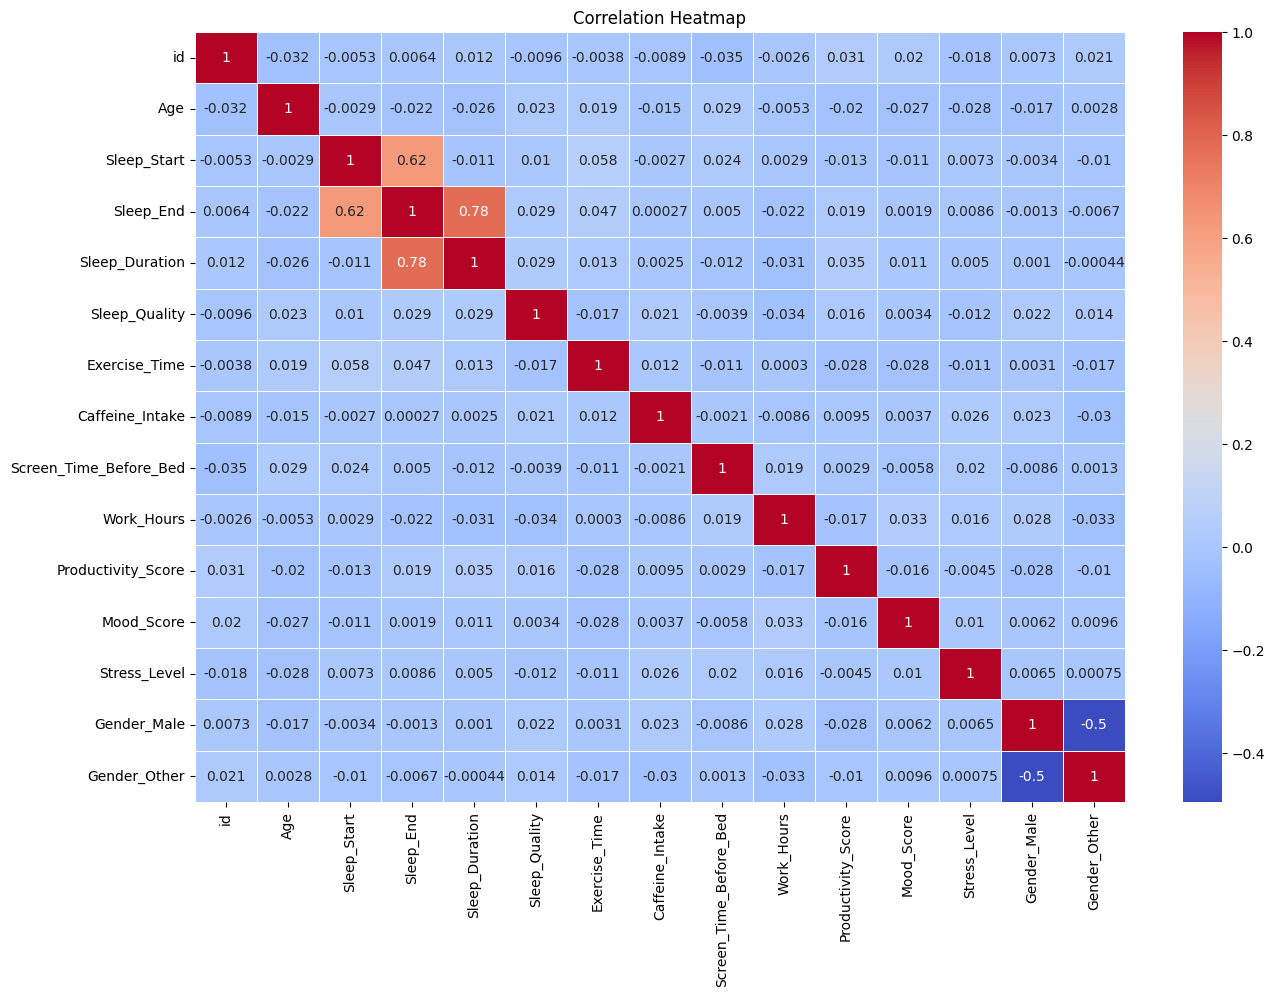

In [442]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Sleep Duration VS Productivity Score

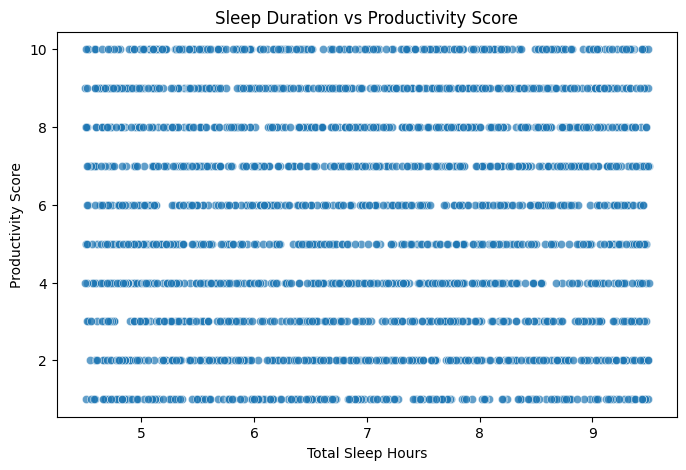

In [437]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_w['Sleep_Duration'], y=df_w['Productivity_Score'], alpha=0.7)
plt.xlabel("Total Sleep Hours")
plt.ylabel("Productivity Score")
plt.title("Sleep Duration vs Productivity Score")
plt.show()

The Impact of Stress on Sleep Quality

C:\Users\bales\AppData\Local\Temp\ipykernel_20100\691604250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Stress_Level'], y=df['Sleep_Quality'], palette="viridis")


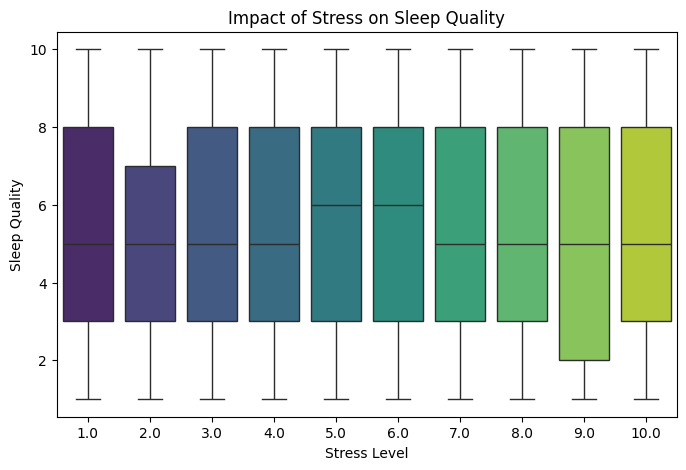

In [441]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Stress_Level'], y=df['Sleep_Quality'], palette="viridis")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Quality")
plt.title("Impact of Stress on Sleep Quality")
plt.show()
# Convert Gender column to numerical values
df_numeric = pd.get_dummies(df, columns=['Gender'], drop_first=True)

Distribution of Sleep Duration

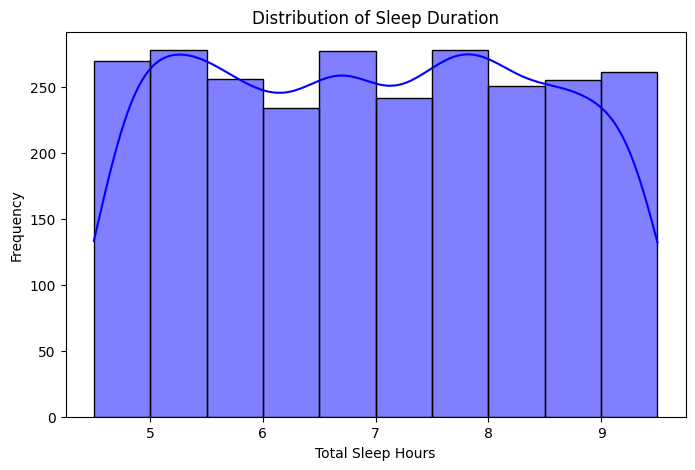

In [352]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep_Duration'], bins=10, kde=True, color='blue')
plt.xlabel("Total Sleep Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Duration")
plt.show()

Sleep Duration VS Mood Score

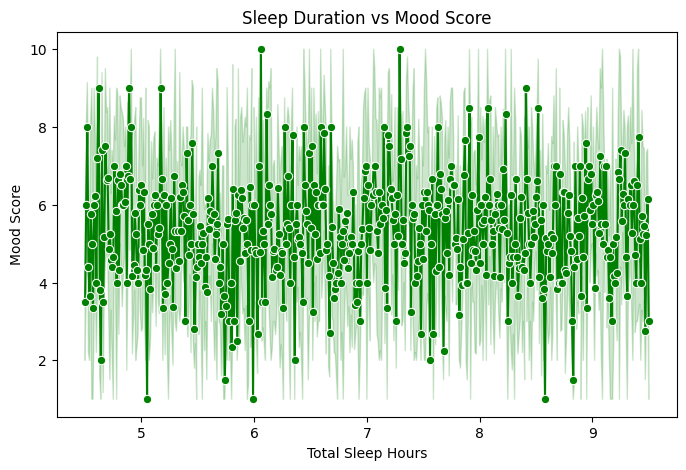

In [353]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Sleep_Duration'], y=df['Mood_Score'], marker="o", color='green')
plt.xlabel("Total Sleep Hours")
plt.ylabel("Mood Score")
plt.title("Sleep Duration vs Mood Score")
plt.show()

Average Productivity Score by Stress Level

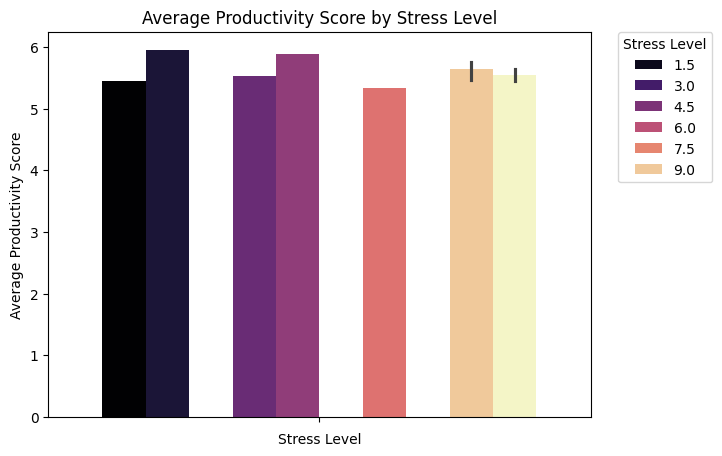

In [354]:
plt.figure(figsize=(7, 5))
sns.barplot(hue=df['Stress_Level'], y=df.groupby('Stress_Level')['Productivity_Score'].mean(), palette='magma')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Stress Level")
plt.ylabel("Average Productivity Score")
plt.title("Average Productivity Score by Stress Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Stress Level")
plt.show()

Frequency of Stress Levels

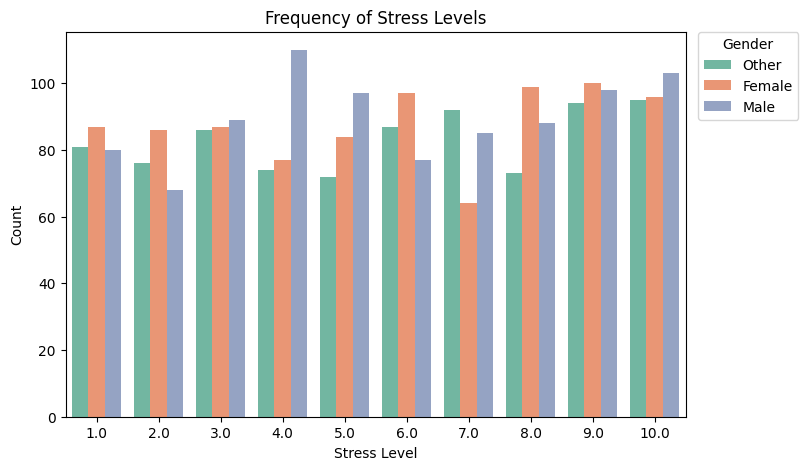

In [355]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Stress_Level'], palette='Set2', hue=df['Gender'])
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Frequency of Stress Levels")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Gender')
plt.show()

Distribution of Mood Score

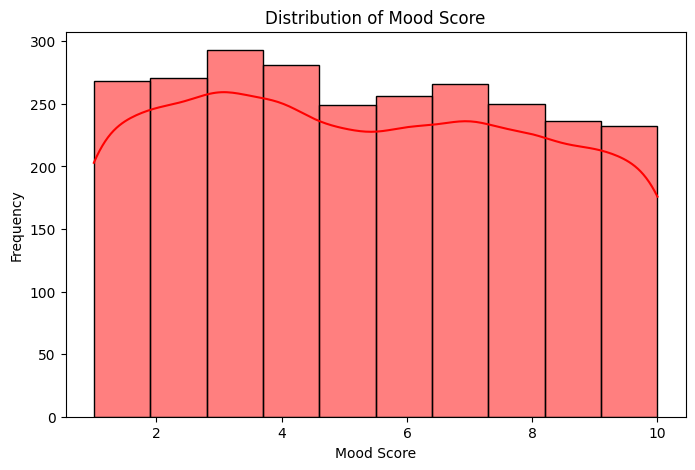

In [356]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Mood_Score'], bins=10, kde=True, color='red')
plt.xlabel("Mood Score")
plt.ylabel("Frequency")
plt.title("Distribution of Mood Score")
plt.show()

Mood Score Across Different Sleep Durations

C:\Users\bales\AppData\Local\Temp\ipykernel_20100\3413872672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Sleep Hours Category'], y=df['Mood_Score'], palette="coolwarm")


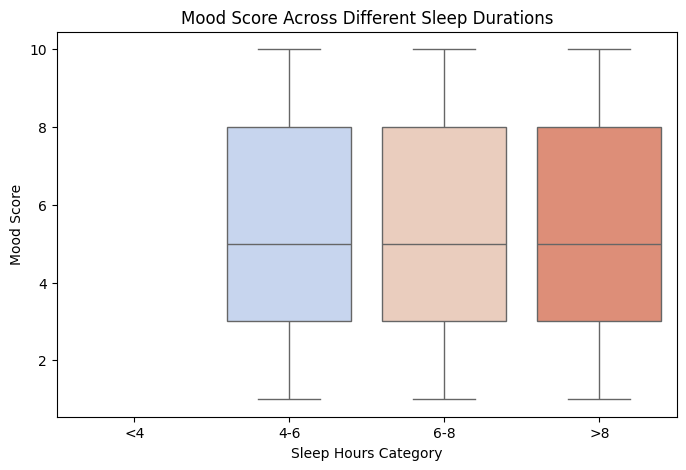

In [444]:

plt.figure(figsize=(8, 5))
df['Sleep Hours Category'] = pd.cut(df['Sleep_Duration'], bins=[0, 4, 6, 8, 10], labels=["<4", "4-6", "6-8", ">8"])
sns.boxplot(x=df['Sleep Hours Category'], y=df['Mood_Score'], palette="coolwarm")
plt.xlabel("Sleep Hours Category")
plt.ylabel("Mood Score")
plt.title("Mood Score Across Different Sleep Durations")
plt.show()